## AQ PROJECT

In [ ]:
#pip install folium.plugins

In [ ]:
#pip install geopy

In [1]:
import pandas as pd
import folium
import h3
import matplotlib.pyplot as plt
import geopandas as gpd
from geopy.distance import geodesic

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.max_seq_items', None)

import warnings
warnings.filterwarnings('ignore')

### Estaciones Ayuntamiento de Madrid

In [3]:
estaciones = pd.read_csv("../data/AytoMad/informacion_estaciones_red_calidad_aire.csv", sep=';')
estaciones.head()

,CODIGO,CODIGO_CORTO,ESTACION,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,COD_TIPO,NOM_TIPO,NO2,SO2,CO,PM10,PM2_5,O3,BTX,COD_VIA,VIA_CLASE,VIA_PAR,VIA_NOMBRE,Fecha alta,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD
0,28079004,4,Plaza de España,Plaza de España,"3°42'43.91""O","40°25'25.98""N",637,UT,Urbana tráfico,X,X,X,NaN,NaN,NaN,NaN,273600,PLAZA,DE,ESPAÑA,01/12/1998,"439579,3291","4475049,263",-3.712257,40.423882
1,28079008,8,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,"3°40'56.22""O","40°25'17.63""N",672,UT,Urbana tráfico,X,X,X,X,X,X,X,18900,CALLE,DE,ALCALA,01/12/1998,"442117,2366","4474770,696",-3.682316,40.421553
2,28079011,11,Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,"3°40'38.50""O","40°27'5.29""N",708,UT,Urbana tráfico,X,NaN,NaN,NaN,NaN,NaN,X,610450,CALLE,DEL,PRINCIPE DE VERGARA,01/12/1998,"442564,0457","4478088,595",-3.677349,40.451473
3,28079016,16,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,"3°38'21.17""O","40°26'24.20""N",695,UF,Urbana fondo,X,NaN,NaN,NaN,NaN,X,NaN,798700,CALLE,DEL,VIZCONDE DE LOS ASILOS,01/12/1998,"445786,1729","4476796,019",-3.639242,40.440046
4,28079017,17,Villaverde,C/ Juan Peñalver,"3°42'47.89""O","40°20'49.74""N",601,UF,Urbana fondo,X,NaN,NaN,NaN,NaN,X,NaN,417200,CALLE,DE,JUAN PEÑALVER,01/12/1998,"439420,7015","4466532,455",-3.713317,40.347147


In [4]:
# Supongamos que tienes un DataFrame llamado 'estaciones' con las columnas 'latitud' y 'longitud'
# estaciones = pd.read_csv('archivo.csv')  # Lee tus datos desde un archivo CSV u otra fuente

# Crear un mapa centrado en una ubicación específica (por ejemplo, latitud y longitud promedio)
mapa = folium.Map(location=[estaciones['LATITUD'].mean(), estaciones['LONGITUD'].mean()], zoom_start=10)

# Agregar marcadores para cada estación
for index, row in estaciones.iterrows():
    folium.Marker([row['LATITUD'], row['LONGITUD']], popup=row['ESTACION']).add_to(mapa)

# Mostrar el mapa
mapa

In [5]:
# Renombrar las columnas CODIGO_CORTO y ESTACION
nuevos_nombres = {'CODIGO_CORTO': 'ESTACION', 'ESTACION': 'NOMBRE'}
estaciones = estaciones.rename(columns=nuevos_nombres)

In [6]:
estaciones.head()

,CODIGO,ESTACION,NOMBRE,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,COD_TIPO,NOM_TIPO,NO2,SO2,CO,PM10,PM2_5,O3,BTX,COD_VIA,VIA_CLASE,VIA_PAR,VIA_NOMBRE,Fecha alta,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD
0,28079004,4,Plaza de España,Plaza de España,"3°42'43.91""O","40°25'25.98""N",637,UT,Urbana tráfico,X,X,X,NaN,NaN,NaN,NaN,273600,PLAZA,DE,ESPAÑA,01/12/1998,"439579,3291","4475049,263",-3.712257,40.423882
1,28079008,8,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,"3°40'56.22""O","40°25'17.63""N",672,UT,Urbana tráfico,X,X,X,X,X,X,X,18900,CALLE,DE,ALCALA,01/12/1998,"442117,2366","4474770,696",-3.682316,40.421553
2,28079011,11,Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,"3°40'38.50""O","40°27'5.29""N",708,UT,Urbana tráfico,X,NaN,NaN,NaN,NaN,NaN,X,610450,CALLE,DEL,PRINCIPE DE VERGARA,01/12/1998,"442564,0457","4478088,595",-3.677349,40.451473
3,28079016,16,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,"3°38'21.17""O","40°26'24.20""N",695,UF,Urbana fondo,X,NaN,NaN,NaN,NaN,X,NaN,798700,CALLE,DEL,VIZCONDE DE LOS ASILOS,01/12/1998,"445786,1729","4476796,019",-3.639242,40.440046
4,28079017,17,Villaverde,C/ Juan Peñalver,"3°42'47.89""O","40°20'49.74""N",601,UF,Urbana fondo,X,NaN,NaN,NaN,NaN,X,NaN,417200,CALLE,DE,JUAN PEÑALVER,01/12/1998,"439420,7015","4466532,455",-3.713317,40.347147


### Calidad del aire - NO2

*NO2 es la magnitud 8*

In [7]:
df = pd.read_csv("../data/AytoMad/Anio23/abr_mo23.csv", sep=';')
df.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,H02,V02,H03,V03,H04,V04,H05,V05,H06,V06,H07,V07,H08,V08,H09,V09,H10,V10,H11,V11,H12,V12,H13,V13,H14,V14,H15,V15,H16,V16,H17,V17,H18,V18,H19,V19,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,4,1,28079004_1_38,2023,4,1,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
1,28,79,4,1,28079004_1_38,2023,4,2,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
2,28,79,4,1,28079004_1_38,2023,4,3,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,2.0,V,2.0,V,2.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
3,28,79,4,1,28079004_1_38,2023,4,4,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,2.0,V,2.0,V,2.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
4,28,79,4,1,28079004_1_38,2023,4,5,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,2.0,V,3.0,V,2.0,N,1.0,N,3.0,N,127.0,N,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V


In [8]:
dfNO2 = df[df["MAGNITUD"] == 8]

In [9]:
dfNO2.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,H02,V02,H03,V03,H04,V04,H05,V05,H06,V06,H07,V07,H08,V08,H09,V09,H10,V10,H11,V11,H12,V12,H13,V13,H14,V14,H15,V15,H16,V16,H17,V17,H18,V18,H19,V19,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
90,28,79,4,8,28079004_8_8,2023,4,1,10.0,V,14.0,V,9.0,V,7.0,V,3.0,V,2.0,V,4.0,V,6.0,V,14.0,V,15.0,V,11.0,V,10.0,V,7.0,V,7.0,V,5.0,V,4.0,V,3.0,V,7.0,V,8.0,V,6.0,V,10.0,V,13.0,V,11.0,V,16.0,V
91,28,79,4,8,28079004_8_8,2023,4,2,12.0,V,16.0,V,21.0,V,15.0,V,7.0,V,6.0,V,10.0,V,20.0,V,30.0,V,27.0,V,17.0,V,10.0,V,7.0,V,5.0,V,6.0,V,5.0,V,5.0,V,5.0,V,8.0,V,11.0,V,12.0,V,17.0,V,19.0,V,20.0,V
92,28,79,4,8,28079004_8_8,2023,4,3,11.0,V,11.0,V,9.0,V,6.0,V,5.0,V,13.0,V,28.0,V,52.0,V,57.0,V,44.0,V,44.0,V,36.0,V,33.0,V,27.0,V,26.0,V,21.0,V,21.0,V,11.0,V,10.0,V,13.0,V,26.0,V,30.0,V,26.0,V,23.0,V
93,28,79,4,8,28079004_8_8,2023,4,4,16.0,V,38.0,V,33.0,V,22.0,V,18.0,V,21.0,V,17.0,V,67.0,V,50.0,V,32.0,V,24.0,V,20.0,V,14.0,V,10.0,V,7.0,V,7.0,V,8.0,V,8.0,V,9.0,V,9.0,V,13.0,V,15.0,V,18.0,V,15.0,V
94,28,79,4,8,28079004_8_8,2023,4,5,14.0,V,18.0,V,13.0,V,12.0,V,10.0,V,18.0,V,33.0,V,53.0,V,65.0,V,26.0,N,115.0,N,132.0,N,23.0,N,15.0,V,15.0,V,14.0,V,11.0,V,14.0,V,17.0,V,22.0,V,32.0,V,76.0,V,94.0,V,85.0,V


In [10]:
dfNO2.shape

(720, 56)

In [11]:
columnas_a_eliminar = [f"V{i:02d}" for i in range(1, 25)]
dfNO2_clean = dfNO2.drop(columnas_a_eliminar, axis=1)

In [12]:
dfNO2_clean.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
90,28,79,4,8,28079004_8_8,2023,4,1,10.0,14.0,9.0,7.0,3.0,2.0,4.0,6.0,14.0,15.0,11.0,10.0,7.0,7.0,5.0,4.0,3.0,7.0,8.0,6.0,10.0,13.0,11.0,16.0
91,28,79,4,8,28079004_8_8,2023,4,2,12.0,16.0,21.0,15.0,7.0,6.0,10.0,20.0,30.0,27.0,17.0,10.0,7.0,5.0,6.0,5.0,5.0,5.0,8.0,11.0,12.0,17.0,19.0,20.0
92,28,79,4,8,28079004_8_8,2023,4,3,11.0,11.0,9.0,6.0,5.0,13.0,28.0,52.0,57.0,44.0,44.0,36.0,33.0,27.0,26.0,21.0,21.0,11.0,10.0,13.0,26.0,30.0,26.0,23.0
93,28,79,4,8,28079004_8_8,2023,4,4,16.0,38.0,33.0,22.0,18.0,21.0,17.0,67.0,50.0,32.0,24.0,20.0,14.0,10.0,7.0,7.0,8.0,8.0,9.0,9.0,13.0,15.0,18.0,15.0
94,28,79,4,8,28079004_8_8,2023,4,5,14.0,18.0,13.0,12.0,10.0,18.0,33.0,53.0,65.0,26.0,115.0,132.0,23.0,15.0,15.0,14.0,11.0,14.0,17.0,22.0,32.0,76.0,94.0,85.0


In [13]:
# Lista de columnas de horas
columnas_horas = [f'H{i:02d}' for i in range(1, 25)]

# Calcular la media de las columnas H01 a H24
dfNO2_clean['avg'] = dfNO2_clean[columnas_horas].mean(axis=1)

In [14]:
dfNO2_clean.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24,avg
90,28,79,4,8,28079004_8_8,2023,4,1,10.0,14.0,9.0,7.0,3.0,2.0,4.0,6.0,14.0,15.0,11.0,10.0,7.0,7.0,5.0,4.0,3.0,7.0,8.0,6.0,10.0,13.0,11.0,16.0,8.416667
91,28,79,4,8,28079004_8_8,2023,4,2,12.0,16.0,21.0,15.0,7.0,6.0,10.0,20.0,30.0,27.0,17.0,10.0,7.0,5.0,6.0,5.0,5.0,5.0,8.0,11.0,12.0,17.0,19.0,20.0,12.958333
92,28,79,4,8,28079004_8_8,2023,4,3,11.0,11.0,9.0,6.0,5.0,13.0,28.0,52.0,57.0,44.0,44.0,36.0,33.0,27.0,26.0,21.0,21.0,11.0,10.0,13.0,26.0,30.0,26.0,23.0,24.291667
93,28,79,4,8,28079004_8_8,2023,4,4,16.0,38.0,33.0,22.0,18.0,21.0,17.0,67.0,50.0,32.0,24.0,20.0,14.0,10.0,7.0,7.0,8.0,8.0,9.0,9.0,13.0,15.0,18.0,15.0,20.458333
94,28,79,4,8,28079004_8_8,2023,4,5,14.0,18.0,13.0,12.0,10.0,18.0,33.0,53.0,65.0,26.0,115.0,132.0,23.0,15.0,15.0,14.0,11.0,14.0,17.0,22.0,32.0,76.0,94.0,85.0,38.625000


In [15]:
cols = ["PROVINCIA", "MUNICIPIO", "MAGNITUD", "PUNTO_MUESTREO", "ANO", "MES", "DIA", "H01","H02","H03","H04","H05","H06","H07","H08","H09","H10","H11","H12","H13","H14","H15","H16","H17","H18","H19","H20","H21","H22","H23","H24" ]

In [16]:
prueba = dfNO2_clean.drop(cols, axis=1)

In [17]:
prueba2 = prueba.groupby("ESTACION").mean()
prueba2.head()

,avg
ESTACION,
4,23.915278
8,27.686111
11,24.776389
16,21.526389
17,30.927778


In [18]:
prueba_map= pd.merge(prueba2, estaciones[['ESTACION', 'LATITUD', 'LONGITUD']], on='ESTACION', how='left')
prueba_map

,ESTACION,avg,LATITUD,LONGITUD
0,4,23.915278,40.423882,-3.712257
1,8,27.686111,40.421553,-3.682316
2,11,24.776389,40.451473,-3.677349
3,16,21.526389,40.440046,-3.639242
4,17,30.927778,40.347147,-3.713317
5,18,20.720833,40.394782,-3.731836
6,24,12.198611,40.419358,-3.747345
7,27,28.345833,40.476918,-3.580026
8,35,37.269444,40.419209,-3.703166
9,36,22.609722,40.407952,-3.645310


In [19]:
prueba_map.to_csv("prueba_map.csv", index=False)

## Interpolación para generar nuevos registros 

#### 3 puntos

In [20]:
# Obtener los valores de las estaciones 38, 39 y 40
valores_estaciones = prueba_map[prueba_map['ESTACION'].isin([38, 39, 50])]['avg']

# Calcular la media de los valores de las estaciones 38, 39 y 50
nuevo_valor_avg = valores_estaciones.mean()

# Calcular la media de las coordenadas para obtener el nuevo punto
nueva_latitud = prueba_map[prueba_map['ESTACION'].isin([38, 39, 50])]['LATITUD'].mean()
nueva_longitud = prueba_map[prueba_map['ESTACION'].isin([38, 39, 50])]['LONGITUD'].mean()

# Crear el nuevo registro
nuevo_registro = {
    'ESTACION': 90,
    'avg': nuevo_valor_avg,
    'LATITUD': nueva_latitud,
    'LONGITUD': nueva_longitud
}

# Crear un DataFrame con el nuevo registro
nuevo_registro_df = pd.DataFrame([nuevo_registro])

# Agregar el nuevo registro al DataFrame original
prueba_map = pd.concat([prueba_map, nuevo_registro_df], ignore_index=True)

In [21]:
# Obtener los valores de las estaciones 38, 48, 4
valores_estaciones = prueba_map[prueba_map['ESTACION'].isin([38, 48, 4])]['avg']

# Calcular la media de los valores de las estaciones 38, 48, 4
nuevo_valor_avg = valores_estaciones.mean()

# Calcular la media de las coordenadas para obtener el nuevo punto
nueva_latitud = prueba_map[prueba_map['ESTACION'].isin([38, 48, 4])]['LATITUD'].mean()
nueva_longitud = prueba_map[prueba_map['ESTACION'].isin([38, 48, 4])]['LONGITUD'].mean()

# Crear el nuevo registro
nuevo_registro = {
    'ESTACION': 91,
    'avg': nuevo_valor_avg,
    'LATITUD': nueva_latitud,
    'LONGITUD': nueva_longitud
}

# Crear un DataFrame con el nuevo registro
nuevo_registro_df = pd.DataFrame([nuevo_registro])

# Agregar el nuevo registro al DataFrame original
prueba_map = pd.concat([prueba_map, nuevo_registro_df], ignore_index=True)

In [22]:
# Obtener los valores de las estaciones 39, 50, 57
valores_estaciones = prueba_map[prueba_map['ESTACION'].isin([39, 50, 57])]['avg']

# Calcular la media de los valores de las estaciones 39, 50, 57
nuevo_valor_avg = valores_estaciones.mean()

# Calcular la media de las coordenadas para obtener el nuevo punto
nueva_latitud = prueba_map[prueba_map['ESTACION'].isin([39, 50, 57])]['LATITUD'].mean()
nueva_longitud = prueba_map[prueba_map['ESTACION'].isin([39, 50, 57])]['LONGITUD'].mean()

# Crear el nuevo registro
nuevo_registro = {
    'ESTACION': 92,
    'avg': nuevo_valor_avg,
    'LATITUD': nueva_latitud,
    'LONGITUD': nueva_longitud
}

# Crear un DataFrame con el nuevo registro
nuevo_registro_df = pd.DataFrame([nuevo_registro])

# Agregar el nuevo registro al DataFrame original
prueba_map = pd.concat([prueba_map, nuevo_registro_df], ignore_index=True)

In [23]:
# Obtener los valores de las estaciones 57, 11, 59
valores_estaciones = prueba_map[prueba_map['ESTACION'].isin([57, 11, 59])]['avg']

# Calcular la media de los valores de las estaciones 57, 11, 59
nuevo_valor_avg = valores_estaciones.mean()

# Calcular la media de las coordenadas para obtener el nuevo punto
nueva_latitud = prueba_map[prueba_map['ESTACION'].isin([57, 11, 59])]['LATITUD'].mean()
nueva_longitud = prueba_map[prueba_map['ESTACION'].isin([57, 11, 59])]['LONGITUD'].mean()

# Crear el nuevo registro
nuevo_registro = {
    'ESTACION': 93,
    'avg': nuevo_valor_avg,
    'LATITUD': nueva_latitud,
    'LONGITUD': nueva_longitud
}

# Crear un DataFrame con el nuevo registro
nuevo_registro_df = pd.DataFrame([nuevo_registro])

# Agregar el nuevo registro al DataFrame original
prueba_map = pd.concat([prueba_map, nuevo_registro_df], ignore_index=True)

#### 2 puntos

In [24]:
# Obtener los valores de las estaciones 4, 24
valores_estaciones = prueba_map[prueba_map['ESTACION'].isin([4, 24])]['avg']

# Calcular la media de los valores de las estaciones 4, 24
nuevo_valor_avg = valores_estaciones.mean()

# Calcular la media de las coordenadas para obtener el nuevo punto
nueva_latitud = prueba_map[prueba_map['ESTACION'].isin([4, 24])]['LATITUD'].mean()
nueva_longitud = prueba_map[prueba_map['ESTACION'].isin([4, 24])]['LONGITUD'].mean()

# Crear el nuevo registro
nuevo_registro = {
    'ESTACION': 94,
    'avg': nuevo_valor_avg,
    'LATITUD': nueva_latitud,
    'LONGITUD': nueva_longitud
}

# Crear un DataFrame con el nuevo registro
nuevo_registro_df = pd.DataFrame([nuevo_registro])

# Agregar el nuevo registro al DataFrame original
prueba_map = pd.concat([prueba_map, nuevo_registro_df], ignore_index=True)

In [25]:
# Obtener los valores de las estaciones 18, 47
valores_estaciones = prueba_map[prueba_map['ESTACION'].isin([18, 47])]['avg']

# Calcular la media de los valores de las estaciones18, 47
nuevo_valor_avg = valores_estaciones.mean()

# Calcular la media de las coordenadas para obtener el nuevo punto
nueva_latitud = prueba_map[prueba_map['ESTACION'].isin([18, 47])]['LATITUD'].mean()
nueva_longitud = prueba_map[prueba_map['ESTACION'].isin([18, 47])]['LONGITUD'].mean()

# Crear el nuevo registro
nuevo_registro = {
    'ESTACION': 95,
    'avg': nuevo_valor_avg,
    'LATITUD': nueva_latitud,
    'LONGITUD': nueva_longitud
}

# Crear un DataFrame con el nuevo registro
nuevo_registro_df = pd.DataFrame([nuevo_registro])

# Agregar el nuevo registro al DataFrame original
prueba_map = pd.concat([prueba_map, nuevo_registro_df], ignore_index=True)

In [26]:
# Obtener los valores de las estaciones 40, 56
valores_estaciones = prueba_map[prueba_map['ESTACION'].isin([40, 56])]['avg']

# Calcular la media de los valores de las estaciones 40, 56
nuevo_valor_avg = valores_estaciones.mean()

# Calcular la media de las coordenadas para obtener el nuevo punto
nueva_latitud = prueba_map[prueba_map['ESTACION'].isin([40, 56])]['LATITUD'].mean()
nueva_longitud = prueba_map[prueba_map['ESTACION'].isin([40, 56])]['LONGITUD'].mean()

# Crear el nuevo registro
nuevo_registro = {
    'ESTACION': 96,
    'avg': nuevo_valor_avg,
    'LATITUD': nueva_latitud,
    'LONGITUD': nueva_longitud
}

# Crear un DataFrame con el nuevo registro
nuevo_registro_df = pd.DataFrame([nuevo_registro])

# Agregar el nuevo registro al DataFrame original
prueba_map = pd.concat([prueba_map, nuevo_registro_df], ignore_index=True)

In [27]:
# Obtener los valores de las estaciones 24, 38
valores_estaciones = prueba_map[prueba_map['ESTACION'].isin([24, 38])]['avg']

# Calcular la media de los valores de las estaciones 24, 38
nuevo_valor_avg = valores_estaciones.mean()

# Calcular la media de las coordenadas para obtener el nuevo punto
nueva_latitud = prueba_map[prueba_map['ESTACION'].isin([24, 38])]['LATITUD'].mean()
nueva_longitud = prueba_map[prueba_map['ESTACION'].isin([24, 38])]['LONGITUD'].mean()

# Crear el nuevo registro
nuevo_registro = {
    'ESTACION': 97,
    'avg': nuevo_valor_avg,
    'LATITUD': nueva_latitud,
    'LONGITUD': nueva_longitud
}

# Crear un DataFrame con el nuevo registro
nuevo_registro_df = pd.DataFrame([nuevo_registro])

# Agregar el nuevo registro al DataFrame original
prueba_map = pd.concat([prueba_map, nuevo_registro_df], ignore_index=True)

In [28]:
prueba_map.columns = [col.capitalize() for col in prueba_map.columns]

In [29]:
prueba_map.head()

,Estacion,Avg,Latitud,Longitud
0,4,23.915278,40.423882,-3.712257
1,8,27.686111,40.421553,-3.682316
2,11,24.776389,40.451473,-3.677349
3,16,21.526389,40.440046,-3.639242
4,17,30.927778,40.347147,-3.713317


## better check 👀

In [79]:
RES = 7

In [80]:
prueba_map['h3'] = prueba_map.apply(lambda x: h3.geo_to_h3(x.Latitud, x.Longitud, RES), axis =1)

In [81]:
import pydeck as pdk

In [82]:
layer = pdk.Layer("H3HexagonLayer", prueba_map, pickable=True, stroked=True, filled=True, extruded=False,
                  get_hexagon="h3", get_fill_color="[255,255,100,50]", get_line_color=[255,255,255], line_width_min_pixels=2)

view_state = pdk.ViewState(latitude=40.4168, longitude=-3.7038, zoom=14, bearing=0, pitch=30)

r = pdk.Deck(layers =[layer], initial_view_state=view_state, tooltip={"text":"Fake Text"})

In [83]:
r

{
  "initialViewState": {
    "bearing": 0,
    "latitude": 40.4168,
    "longitude": -3.7038,
    "pitch": 30,
    "zoom": 14
  },
  "layers": [
    {
      "@@type": "H3HexagonLayer",
      "data": [
        {
          "Avg": 23.915277777777778,
          "Estacion": 4,
          "Latitud": 40.4238823,
          "Longitud": -3.7122567,
          "h3": "87390cb1bffffff"
        },
        {
          "Avg": 27.686111111111114,
          "Estacion": 8,
          "Latitud": 40.4215533,
          "Longitud": -3.6823158,
          "h3": "87390ca26ffffff"
        },
        {
          "Avg": 24.77638888888889,
          "Estacion": 11,
          "Latitud": 40.4514734,
          "Longitud": -3.6773491,
          "h3": "87390ca24ffffff"
        },
        {
          "Avg": 21.52638888888889,
          "Estacion": 16,
          "Latitud": 40.4400457,
          "Longitud": -3.6392422,
          "h3": "87390ca25ffffff"
        },
        {
          "Avg": 30.92777777777778,
          "Estacion": 17,
          "Latitud": 40.347147,
          "Longitud": -3.7133167,
          "h3": "87390cb89ffffff"
        },
        {
          "Avg": 20.720833333333335,
          "Estacion": 18,
          "Latitud": 40.3947825,
          "Longitud": -3.7318356,
          "h3": "87390cba9ffffff"
        },
        {
          "Avg": 12.198611111111111,
          "Estacion": 24,
          "Latitud": 40.4193577,
          "Longitud": -3.7473445,
          "h3": "87390cbadffffff"
        },
        {
          "Avg": 28.345833333333335,
          "Estacion": 27,
          "Latitud": 40.4769179,
          "Longitud": -3.5800258,
          "h3": "87390cb51ffffff"
        },
        {
          "Avg": 37.26944444444444,
          "Estacion": 35,
          "Latitud": 40.4192091,
          "Longitud": -3.7031662,
          "h3": "87390cb1bffffff"
        },
        {
          "Avg": 22.60972222222222,
          "Estacion": 36,
          "Latitud": 40.4079517,
          "Longitud": -3.6453104,
          "h3": "87390ca22ffffff"
        },
        {
          "Avg": 20.6375,
          "Estacion": 38,
          "Latitud": 40.4455439,
          "Longitud": -3.7071303,
          "h3": "87390cb19ffffff"
        },
        {
          "Avg": 22.623611111111114,
          "Estacion": 39,
          "Latitud": 40.4782322,
          "Longitud": -3.7115364,
          "h3": "87390cb0effffff"
        },
        {
          "Avg": 23.975,
          "Estacion": 40,
          "Latitud": 40.3881478,
          "Longitud": -3.6515286,
          "h3": "87390ca31ffffff"
        },
        {
          "Avg": 24.875,
          "Estacion": 47,
          "Latitud": 40.3980991,
          "Longitud": -3.6868138,
          "h3": "87390ca35ffffff"
        },
        {
          "Avg": 22.95277777777778,
          "Estacion": 48,
          "Latitud": 40.4398904,
          "Longitud": -3.6903729,
          "h3": "87390cb19ffffff"
        },
        {
          "Avg": 15.341666666666667,
          "Estacion": 49,
          "Latitud": 40.4144444,
          "Longitud": -3.6824999,
          "h3": "87390ca35ffffff"
        },
        {
          "Avg": 24.806944444444447,
          "Estacion": 50,
          "Latitud": 40.4655841,
          "Longitud": -3.6887449,
          "h3": "87390cb0affffff"
        },
        {
          "Avg": 25.709722222222222,
          "Estacion": 54,
          "Latitud": 40.3730118,
          "Longitud": -3.6121394,
          "h3": "87390ca00ffffff"
        },
        {
          "Avg": 25.019444444444446,
          "Estacion": 55,
          "Latitud": 40.4623628,
          "Longitud": -3.5805649,
          "h3": "87390cb53ffffff"
        },
        {
          "Avg": 29.716666666666665,
          "Estacion": 56,
          "Latitud": 40.3850336,
          "Longitud": -3.7187679,
          "h3": "87390ca36ffffff"
        },
        {
          "Avg": 17.955555555555556,
          "Estacion": 57,
          "Latitud": 40.4942012,
          "Longitud": -3.6605173,
  

In [84]:
prueba_map.to_csv('prueba_NO2.csv', index = False)

In [78]:
prueba_map.head()

,Estacion,Avg,Latitud,Longitud,h3
0,4,23.915278,40.423882,-3.712257,88390cb1bdfffff
1,8,27.686111,40.421553,-3.682316,88390ca265fffff
2,11,24.776389,40.451473,-3.677349,88390ca24dfffff
3,16,21.526389,40.440046,-3.639242,88390ca20bfffff
4,17,30.927778,40.347147,-3.713317,88390cb899fffff


In [37]:
# Crea un mapa centrado en Madrid
mapa = folium.Map(location=[40.4168, -3.7038], zoom_start=12)  # Coordenadas de Madrid

# Itera sobre el DataFrame para agregar marcadores al mapa
for index, row in prueba_map.iterrows():
    folium.Marker([row['Latitud'], row['Longitud']], popup=row['Avg']).add_to(mapa)

# Muestra el mapa
mapa


In [59]:
from folium.plugins import HeatMap

# Supongamos que tienes una lista de listas con las coordenadas y el valor promedio (avg) de tu DataFrame
datos_mapa = [[row['Latitud'], row['Longitud'], row['Avg']] for index, row in prueba_map.iterrows()]

# Normaliza los valores de avg para que estén en el rango [0, 1] (opcional, dependiendo de tus datos)
valor_min = prueba_map['Avg'].min()
valor_max = prueba_map['Avg'].max()
datos_mapa = [[fila[0], fila[1], (fila[2] - valor_min) / (valor_max - valor_min)] for fila in datos_mapa]

# Define tu paleta de colores personalizada
colores = ['lime', 'yellow', 'red']  # Cambia estos colores según tu preferencia
mapa_calor = HeatMap(datos_mapa, gradient={0.0: colores[0], 0.5: colores[1], 1.0: colores[2]}, radius=40, blur=15)

# Crea un mapa centrado en Madrid
mapa = folium.Map(location=[40.4168, -3.7038], zoom_start=12)  # Coordenadas de Madrid

# Agrega el mapa de calor al mapa principal
mapa.add_child(mapa_calor)

# Muestra el mapa
mapa


In [61]:
prueba_map.head()

,Estacion,Avg,Latitud,Longitud,h3
0,4,23.915278,40.423882,-3.712257,87390cb1bffffff
1,8,27.686111,40.421553,-3.682316,87390ca26ffffff
2,11,24.776389,40.451473,-3.677349,87390ca24ffffff
3,16,21.526389,40.440046,-3.639242,87390ca25ffffff
4,17,30.927778,40.347147,-3.713317,87390cb89ffffff


In [ ]:
# Create an empty dataframe to write data into
h3_df = pd.DataFrame([],columns=['country','city','sector','h3_id','h3_geo_boundary','h3_centroid']) 
# Iterate over every row of the geo dataframe
for row in dubai_gdf.tqdm(itertuples()):  
    # Parse out info from columns of row
    country = row.Country
    city = row.City
    district_multipolygon = row.Geometry
    district_sector = row.Sector
    # Convert multi-polygon into list of polygons
    district_polygon = list(district_multipolygon) 
    for polygon in district_polygon:
        # Convert Polygon to GeoJSON dictionary
        poly_geojson = gpd.GeoSeries([polygon]).__geo_interface__
        # Parse out geometry key from GeoJSON dictionary
        poly_geojson = poly_geojson['features'][0]['geometry'] 
        # Fill the dictionary with Resolution 10 H3 Hexagons
        h3_hexes = h3.polyfill_geojson(poly_geojson, 10) 
        for h3_hex in h3_hexes:
            h3_geo_boundary = shapely.geometry.Polygon(
                h3.h3_to_geo_boundary(h3_hex,geo_json=True)
            )
            h3_centroid = h3.h3_to_geo(h3_hex)
            # Append results to dataframe
            h3_df.loc[len(h3_df)]=[
                country,
                city,
                district_sector,
                h3_hex,
                h3_geo_boundary,
                h3_centroid
            ]

In [90]:
gpkg_path = '../data/gadm36_ESP.gpkg' 
# Layer selected after sampling on GeoPackage viewer
sp_gdf = gpd.read_file(gpkg_path, layer='gadm36_ESP_2')

In [91]:
sp_gdf

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,ESP,Spain,ESP.1_1,Andalucía,NaN,ESP.1.1_1,Almería,NaN,NaN,Provincia,Province,04,ES.AN.AM,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35..."
1,ESP,Spain,ESP.1_1,Andalucía,NaN,ESP.1.2_1,Cádiz,NaN,NaN,Provincia,Province,11,ES.AN.CD,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36..."
2,ESP,Spain,ESP.1_1,Andalucía,NaN,ESP.1.3_1,Córdoba,NaN,NaN,Provincia,Province,14,ES.AN.CO,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37..."
3,ESP,Spain,ESP.1_1,Andalucía,NaN,ESP.1.4_1,Granada,NaN,NaN,Provincia,Province,18,ES.AN.GD,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36..."
4,ESP,Spain,ESP.1_1,Andalucía,NaN,ESP.1.5_1,Huelva,NaN,NaN,Provincia,Province,21,ES.AN.HL,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37..."
5,ESP,Spain,ESP.1_1,Andalucía,NaN,ESP.1.6_1,Jaén,NaN,NaN,Provincia,Province,23,ES.AN.JA,"MULTIPOLYGON (((-3.00812 37.60799, -3.02137 37..."
6,ESP,Spain,ESP.1_1,Andalucía,NaN,ESP.1.7_1,Málaga,NaN,NaN,Provincia,Province,29,ES.AN.MG,"MULTIPOLYGON (((-4.00083 36.73986, -4.00153 36..."
7,ESP,Spain,ESP.1_1,Andalucía,NaN,ESP.1.8_1,Sevilla,NaN,NaN,Provincia,Province,41,ES.AN.SV,"MULTIPOLYGON (((-5.94118 36.85199, -5.95270 36..."
8,ESP,Spain,ESP.2_1,Aragón,NaN,ESP.2.1_1,Huesca,NaN,NaN,Provincia,Province,22,ES.AR.HS,"MULTIPOLYGON (((0.34747 41.42733, 0.34187 41.4..."
9,ESP,Spain,ESP.2_1,Aragón,NaN,ESP.2.2_1,Teruel,NaN,NaN,Provincia,Province,44,ES.AR.TE,"MULTIPOLYGON (((0.02648 40.69497, 0.02688 40.7..."


In [96]:
sp_gdf = sp_gdf[sp_gdf['NAME_2'] == 'Madrid']
sp_gdf

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
32,ESP,Spain,ESP.8_1,Comunidad de Madrid,NaN,ESP.8.1_1,Madrid,NaN,NaN,Provincia,Province,28,ES.MD.MD,"MULTIPOLYGON (((-4.27502 40.67631, -4.26984 40..."


In [98]:
sp_gdf = sp_gdf[['NAME_0','NAME_1','NAME_2','geometry']]
sp_gdf

,NAME_0,NAME_1,NAME_2,geometry
32,Spain,Comunidad de Madrid,Madrid,"MULTIPOLYGON (((-4.27502 40.67631, -4.26984 40..."


In [99]:
sp_gdf.columns = ['Country','Provincia','City','Geometry']
sp_gdf

,Country,Provincia,City,Geometry
32,Spain,Comunidad de Madrid,Madrid,"MULTIPOLYGON (((-4.27502 40.67631, -4.26984 40..."


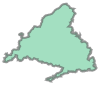

In [126]:
sp_gdf.iloc[0][3]

## barrios MAD

In [127]:
# Ruta al archivo GeoJSON
ruta_archivo = '../data/madrid-districts.geojson'

# Carga el archivo GeoJSON en un GeoDataFrame
mad = gpd.read_file(ruta_archivo)

In [128]:
mad

,name,cartodb_id,created_at,updated_at,geometry
0,Centro,1,2013-12-02 07:20:26+01:00,2013-12-02 07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40..."
1,Arganzuela,2,2013-12-02 07:20:26+01:00,2013-12-02 07:20:26+01:00,"MULTIPOLYGON (((-3.70258 40.40638, -3.70166 40..."
2,Retiro,3,2013-12-02 07:20:26+01:00,2013-12-02 07:20:26+01:00,"MULTIPOLYGON (((-3.66279 40.40971, -3.66384 40..."
3,Salamanca,4,2013-12-02 07:20:26+01:00,2013-12-02 07:20:26+01:00,"MULTIPOLYGON (((-3.65809 40.43945, -3.65828 40..."
4,Chamartin,5,2013-12-02 07:20:26+01:00,2013-12-02 07:20:26+01:00,"MULTIPOLYGON (((-3.67231 40.48388, -3.67237 40..."
5,Tetuan,6,2013-12-02 07:20:26+01:00,2013-12-02 07:20:26+01:00,"MULTIPOLYGON (((-3.69633 40.47572, -3.69619 40..."
6,Chamberi,7,2013-12-02 07:20:26+01:00,2013-12-02 07:20:26+01:00,"MULTIPOLYGON (((-3.68991 40.44737, -3.69048 40..."
7,Fuencarral-El Pardo,8,2013-12-02 07:20:26+01:00,2013-12-02 07:20:26+01:00,"MULTIPOLYGON (((-3.64131 40.63922, -3.64118 40..."
8,Moncloa-Aravaca,9,2013-12-02 07:20:26+01:00,2013-12-02 07:20:26+01:00,"MULTIPOLYGON (((-3.79973 40.47063, -3.79887 40..."
9,Latina,10,2013-12-02 07:20:26+01:00,2013-12-02 07:20:26+01:00,"MULTIPOLYGON (((-3.72130 40.41256, -3.72051 40..."


In [ ]:
from selenium import webdriver

# Ruta al archivo GeoJSON exportado desde Kepler
ruta_archivo = 'ruta/al/archivo.geojson'

# Configuración del navegador controlado por Selenium
driver = webdriver.Chrome()  # Asegúrate de tener el controlador correspondiente configurado (Chrome, Firefox, etc.)

# Abre el archivo HTML para mostrar el GeoJSON en un mapa web
driver.get(f"data:text/html;charset=utf-8,<html><head></head><body><div id='map' style='width: 100%; height: 500px;'></div><script src='https://unpkg.com/leaflet@1.7.1/dist/leaflet.js'></script><script>var map = L.map('map').setView([0, 0], 2); L.tileLayer('https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png').addTo(map); var geojsonLayer = L.geoJSON.ajax('{ruta_archivo}', {onEachFeature: function (feature, layer) {layer.bindPopup(JSON.stringify(feature.properties));}}).addTo(map);</script></body></html>")

# Espera unos segundos para asegurarte de que el mapa se carga completamente antes de cerrar el navegador
import time
time.sleep(5)

# Cierra el navegador controlado por Selenium
driver.quit()


## check 👀

In [205]:
from branca.colormap import LinearColormap
import folium
import h3

# Crear un mapa de Folium centrado en Madrid
madrid_coords = [40.4168, -3.7038]
mapa = folium.Map(location=madrid_coords, zoom_start=12)

# Encontrar el rango de valores de avg para establecer la escala de colores
max_avg = prueba_map['avg'].max()
min_avg = prueba_map['avg'].min()

# Crear un colormap lineal entre rojo y verde basado en los valores de avg, pero invertido
colormap = LinearColormap(colors=['green', 'yellow', 'red'], vmin=min_avg, vmax=max_avg).to_step(10)

# Iterar sobre cada fila del DataFrame
for index, row in prueba_map.iterrows():
    # Obtener coordenadas de la fila actual
    latitud = row['LATITUD']
    longitud = row['LONGITUD']
    valor_so2 = row['avg']  # Valor de SO2 en esta fila
    estacion = row['ESTACION']  # Nombre de la estación
    
    # Convertir coordenadas a hexágono H3
    hexagono_central = h3.geo_to_h3(latitud, longitud, nivel_resolucion)
    
    # Obtener los hexágonos vecinos a una distancia determinada (por ejemplo, 1 nivel de distancia)
    nivel_distancia = 10
    hexagonos_vecinos = h3.k_ring(hexagono_central, nivel_distancia)
    
    # Calcular la influencia de SO2 para cada hexágono vecino
    influencia_total = 0
    for hexagono_vecino in hexagonos_vecinos:
        # Obtener la distancia entre el hexágono central y el vecino
        distancia_central_vecino = h3.h3_distance(hexagono_central, hexagono_vecino)
        
        # Calcular la influencia exponencial en función de la distancia
        influencia = calcular_influencia(distancia_central_vecino)
        
        # Sumar la influencia ponderada por el valor de SO2
        influencia_total += influencia * valor_so2
    
    # Calcular el promedio de influencia total para los hexágonos vecinos
    influencia_promedio = influencia_total / len(hexagonos_vecinos)
    
    # Crear polígonos para los hexágonos H3 y agregar al mapa con el color correspondiente
    folium.GeoJson(
        {
            'type': 'Feature',
            'geometry': {
                'type': 'Polygon',
                'coordinates': [h3.h3_to_geo_boundary(hexagono_central, geo_json=True)]
            },
            'properties': {'tooltip': f"Avg SO2: {valor_so2}", 'style': {'fillColor': colormap(valor_so2), 'fillOpacity': 0.6}}
        },
        tooltip=f"Avg SO2: {valor_so2}"
    ).add_to(mapa)
    
    # Agregar marcador para la coordenada actual con el nombre de la estación como popup
    folium.Marker(
        location=[latitud, longitud],
        popup=f'Estación: {estacion}',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa)

# Guardar el mapa como un archivo HTML para visualización interactiva
mapa.save('mapa_avg_so2_hexagonos_con_marcadores.html')

In [206]:
mapa

In [213]:
prueba_map.head()

,ESTACION,avg,LATITUD,LONGITUD,hex_id
0,4,23.915278,40.423882,-3.712257,8c390cb1bd539ff
1,8,27.686111,40.421553,-3.682316,8c390ca26529dff
2,11,24.776389,40.451473,-3.677349,8c390ca24d2d3ff
3,16,21.526389,40.440046,-3.639242,8c390ca20b643ff
4,17,30.927778,40.347147,-3.713317,8c390cb8980cbff


In [207]:
from branca.colormap import LinearColormap

# Crear un mapa de Folium centrado en Madrid
madrid_coords = [40.4168, -3.7038]
mapa = folium.Map(location=madrid_coords, zoom_start=12)

# Encontrar el rango de valores de avg para establecer la escala de colores
max_avg = prueba_map['avg'].max()
min_avg = prueba_map['avg'].min()

# Crear un colormap lineal entre rojo y verde basado en los valores de avg, pero invertido
colormap = LinearColormap(colors=['green', 'yellow', 'red'], vmin=min_avg, vmax=max_avg).to_step(10)

# Iterar sobre cada fila del DataFrame
for index, row in prueba_map.iterrows():
    # Obtener coordenadas de la fila actual
    latitud = row['LATITUD']
    longitud = row['LONGITUD']
    valor_so2 = row['avg']  # Valor de SO2 en esta fila
    
    # Convertir coordenadas a hexágono H3
    hexagono_central = h3.geo_to_h3(latitud, longitud, nivel_resolucion)
    
    # Obtener los hexágonos vecinos a una distancia determinada (por ejemplo, 1 nivel de distancia)
    nivel_distancia = 8
    hexagonos_vecinos = h3.k_ring(hexagono_central, nivel_distancia)
    
    # Calcular la influencia de SO2 para cada hexágono vecino
    influencia_total = 0
    for hexagono_vecino in hexagonos_vecinos:
        # Obtener la distancia entre el hexágono central y el vecino
        distancia_central_vecino = h3.h3_distance(hexagono_central, hexagono_vecino)
        
        # Calcular la influencia exponencial en función de la distancia
        influencia = calcular_influencia(distancia_central_vecino)
        
        # Sumar la influencia ponderada por el valor de SO2
        influencia_total += influencia * valor_so2
    
    # Calcular el promedio de influencia total para los hexágonos vecinos
    influencia_promedio = influencia_total / len(hexagonos_vecinos)
    
    # Crear polígonos para los hexágonos H3 y agregar al mapa con el color correspondiente
    poligono_hexagono = {
        'type': 'Polygon',
        'coordinates': [h3.h3_to_geo_boundary(hexagono_central, geo_json=True)]
    }
    folium.GeoJson(poligono_hexagono, tooltip=f"Avg SO2: {valor_so2}", style_function=lambda x, colormap=colormap, valor_so2=valor_so2: {'fillColor': colormap(valor_so2), 'fillOpacity': 0.6}).add_to(mapa)

# Guardar el mapa como un archivo HTML para visualización interactiva
mapa.save('mapa_avg_so2_hexagonos.html')

In [208]:
mapa

In [215]:
prueba_map.head()

,ESTACION,avg,LATITUD,LONGITUD,hex_id
0,4,23.915278,40.423882,-3.712257,8c390cb1bd539ff
1,8,27.686111,40.421553,-3.682316,8c390ca26529dff
2,11,24.776389,40.451473,-3.677349,8c390ca24d2d3ff
3,16,21.526389,40.440046,-3.639242,8c390ca20b643ff
4,17,30.927778,40.347147,-3.713317,8c390cb8980cbff


In [216]:
prueba_map.to_csv('prueba.csv', index=False)

In [217]:
prueba_map.to_json('datos.json', orient='records')

# Prueba_map

## HEAT MAP

In [211]:
import pandas as pd
import folium
from folium import plugins

# Suponiendo que 'prueba_map' es tu DataFrame con columnas 'LATITUD', 'LONGITUD', y 'avg'

# Cargar tu DataFrame
# prueba_map = pd.read_csv('archivo.csv')  # Si tus datos están en un archivo CSV, por ejemplo

# Coordenadas de Madrid
latitud_madrid = 40.4168
longitud_madrid = -3.7038

# Crear un mapa centrado en Madrid
mapa = folium.Map(location=[latitud_madrid, longitud_madrid], zoom_start=10)

# Crear una lista de listas con las coordenadas y valores de NO2
data = prueba_map[['LATITUD', 'LONGITUD', 'avg']].values.tolist()

# Crear el mapa de calor con HeatMap
mapa.add_child(plugins.HeatMap(data=data, radius=30))

# Mostrar el mapa
mapa


In [212]:
# Suponiendo que 'prueba_map' es tu DataFrame con columnas 'LATITUD', 'LONGITUD', y 'avg'

# Exportar a CSV
prueba_map[['LATITUD', 'LONGITUD', 'avg']].to_csv('datos_no2.csv', index=False)

# O exportar a GeoJSON
prueba_map[['LATITUD', 'LONGITUD', 'avg']].to_json('datos_no2.geojson', orient='records')


## H3

In [137]:
# Define la resolución de los hexágonos (puedes ajustar este valor según tu preferencia)
resolution = 12

# Obtén los hexágonos para cada punto en base a su latitud y longitud y asigna el nivel de resolución (zoom)
def get_hexagons(row):
    lat, lon = row['LATITUD'], row['LONGITUD']
    hex_id = h3.geo_to_h3(lat, lon, resolution)
    return hex_id

# Aplica la función get_hexagons a cada fila del DataFrame
prueba_map['hex_id'] = prueba_map.apply(get_hexagons, axis=1)

# Calcula el promedio de 'avg' por hexágono
avg_by_hex = prueba_map.groupby('hex_id')['avg'].mean().reset_index()

# Crea un mapa de folium centrado en un punto promedio de tus datos
m = folium.Map(location=[prueba_map['LATITUD'].mean(), prueba_map['LONGITUD'].mean()], zoom_start=10)

# Agrega los hexágonos al mapa
for index, row in avg_by_hex.iterrows():
    hex_center = h3.h3_to_geo(row['hex_id'])
    lat, lon = hex_center[0], hex_center[1]
    value = row['avg']
    folium.RegularPolygonMarker(location=[lat, lon], fill_color='#FF0000', number_of_sides=6, radius=10, popup=f'Average: {value}').add_to(m)

In [138]:
m

In [139]:
# Guardar datos como CSV
avg_by_hex.to_csv('avg_by_hex.csv', index=False)

In [92]:
import pandas as pd
import h3
import math
import folium
from branca.colormap import LinearColormap

# Función para calcular la influencia exponencial
def calcular_influencia(distancia):
    distancia_decaida = 1000  # Parámetro de la decaída exponencial
    influencia = math.exp(-distancia / distancia_decaida)  # Fórmula de decaída exponencial
    return influencia

# Nivel de resolución de los hexágonos H3
nivel_resolucion = 8  # Puedes ajustar este nivel según la escala deseada

# Crear un mapa de Folium centrado en Madrid
madrid_coords = [40.4168, -3.7038]
mapa = folium.Map(location=madrid_coords, zoom_start=12)

# Obtener los valores máximos y mínimos de 'avg' para establecer la escala de colores
max_avg = prueba_map['avg'].max()
min_avg = prueba_map['avg'].min()

# Crear un colormap lineal entre rojo y verde basado en los valores de 'avg'
colormap = LinearColormap(colors=['green', 'yellow', 'red'], vmin=min_avg, vmax=max_avg).to_step(10)

# Iterar sobre cada fila del DataFrame
for index, row in prueba_map.iterrows():
    # Obtener coordenadas de la fila actual
    latitud = row['LATITUD']
    longitud = row['LONGITUD']
    valor_avg = row['avg']  # Valor de 'avg' en esta fila
    
    # Convertir coordenadas a hexágono H3
    hexagono_central = h3.geo_to_h3(latitud, longitud, nivel_resolucion)
    
    # Obtener los hexágonos vecinos a una distancia determinada (por ejemplo, 1 nivel de distancia)
    nivel_distancia = 1
    hexagonos_vecinos = h3.k_ring(hexagono_central, nivel_distancia)
    
    # Crear polígonos para los hexágonos vecinos y agregar al mapa con el color correspondiente
    for hexagono_vecino in hexagonos_vecinos:
        poligono_hexagono = {
            'type': 'Polygon',
            'coordinates': [h3.h3_to_geo_boundary(hexagono_vecino, geo_json=True)]
        }
        
        # Agregar el GeoJson al mapa con tooltip del valor 'avg'
        folium.GeoJson(
            poligono_hexagono,
            style_function=lambda x, valor_avg=valor_avg, colormap=colormap: {'fillColor': colormap(valor_avg), 'fillOpacity': 0.6},
            tooltip=f'Avg: {valor_avg}'
        ).add_to(mapa)

# Guardar el mapa como un archivo HTML para visualización interactiva
mapa.save('mapa_hexagonos_avg_tooltip.html')


In [93]:
mapa

In [134]:
import pandas as pd
import h3
import math
import folium

# Función para calcular la influencia exponencial
def calcular_influencia(distancia):
    distancia_decaida = 100  # Parámetro de la decaída exponencial
    influencia = math.exp(-distancia / distancia_decaida)  # Fórmula de decaída exponencial
    return influencia

# Nivel de resolución de los hexágonos H3
nivel_resolucion = 7  # Puedes ajustar este nivel según la escala deseada

# Crear un mapa de Folium centrado en Madrid
madrid_coords = [40.4168, -3.7038]
mapa = folium.Map(location=madrid_coords, zoom_start=12)

# Iterar sobre cada fila del DataFrame
for index, row in prueba_map.iterrows():
    # Obtener coordenadas de la fila actual
    latitud = row['LATITUD']
    longitud = row['LONGITUD']
    valor_so2 = row['avg']  # Valor de SO2 en esta fila
    
    # Convertir coordenadas a hexágono H3
    hexagono_central = h3.geo_to_h3(latitud, longitud, nivel_resolucion)
    
    # Obtener los hexágonos vecinos a una distancia determinada (por ejemplo, 1 nivel de distancia)
    nivel_distancia = 10
    hexagonos_vecinos = h3.k_ring(hexagono_central, nivel_distancia)
    
    # Calcular la influencia de SO2 para cada hexágono vecino
    influencia_total = 0
    for hexagono_vecino in hexagonos_vecinos:
        # Obtener la distancia entre el hexágono central y el vecino
        distancia_central_vecino = h3.h3_distance(hexagono_central, hexagono_vecino)
        
        # Calcular la influencia exponencial en función de la distancia
        influencia = calcular_influencia(distancia_central_vecino)
        
        # Sumar la influencia ponderada por el valor de SO2
        influencia_total += influencia * valor_so2
    
    # Calcular el promedio de influencia total para los hexágonos vecinos
    influencia_promedio = influencia_total / len(hexagonos_vecinos)
    
    # Crear polígonos para los hexágonos H3 y agregar al mapa
    poligono_hexagono = {
        'type': 'Polygon',
        'coordinates': [h3.h3_to_geo_boundary(hexagono_central, geo_json=True)]
    }
    folium.GeoJson(poligono_hexagono, tooltip=f"Avg SO2: {influencia_promedio}").add_to(mapa)

# Guardar el mapa como un archivo HTML para visualización interactiva
mapa.save('mapa_avg_so2_hexagonos.html')


In [135]:
mapa

In [146]:
from branca.colormap import LinearColormap

# Crear un mapa de Folium centrado en Madrid
madrid_coords = [40.4168, -3.7038]
mapa = folium.Map(location=madrid_coords, zoom_start=12)

# Encontrar el rango de valores de avg para establecer la escala de colores
max_avg = prueba_map['avg'].max()
min_avg = prueba_map['avg'].min()

# Crear un colormap lineal entre rojo y verde basado en los valores de avg, pero invertido
colormap = LinearColormap(colors=['green', 'yellow', 'red'], vmin=min_avg, vmax=max_avg).to_step(10)

# Iterar sobre cada fila del DataFrame
for index, row in prueba_map.iterrows():
    # Obtener coordenadas de la fila actual
    latitud = row['LATITUD']
    longitud = row['LONGITUD']
    valor_so2 = row['avg']  # Valor de SO2 en esta fila
    
    # Convertir coordenadas a hexágono H3
    hexagono_central = h3.geo_to_h3(latitud, longitud, nivel_resolucion)
    
    # Obtener los hexágonos vecinos a una distancia determinada (por ejemplo, 1 nivel de distancia)
    nivel_distancia = 8
    hexagonos_vecinos = h3.k_ring(hexagono_central, nivel_distancia)
    
    # Calcular la influencia de SO2 para cada hexágono vecino
    influencia_total = 0
    for hexagono_vecino in hexagonos_vecinos:
        # Obtener la distancia entre el hexágono central y el vecino
        distancia_central_vecino = h3.h3_distance(hexagono_central, hexagono_vecino)
        
        # Calcular la influencia exponencial en función de la distancia
        influencia = calcular_influencia(distancia_central_vecino)
        
        # Sumar la influencia ponderada por el valor de SO2
        influencia_total += influencia * valor_so2
    
    # Calcular el promedio de influencia total para los hexágonos vecinos
    influencia_promedio = influencia_total / len(hexagonos_vecinos)
    
    # Crear polígonos para los hexágonos H3 y agregar al mapa con el color correspondiente
    poligono_hexagono = {
        'type': 'Polygon',
        'coordinates': [h3.h3_to_geo_boundary(hexagono_central, geo_json=True)]
    }
    folium.GeoJson(poligono_hexagono, tooltip=f"Avg SO2: {valor_so2}", style_function=lambda x, colormap=colormap, valor_so2=valor_so2: {'fillColor': colormap(valor_so2), 'fillOpacity': 0.6}).add_to(mapa)

# Guardar el mapa como un archivo HTML para visualización interactiva
mapa.save('mapa_avg_so2_hexagonos.html')


In [147]:
mapa

In [73]:
from branca.colormap import LinearColormap
import folium
import h3

# Crear un mapa de Folium centrado en Madrid
madrid_coords = [40.4168, -3.7038]
mapa = folium.Map(location=madrid_coords, zoom_start=12)

# Encontrar el rango de valores de avg para establecer la escala de colores
max_avg = prueba_map['avg'].max()
min_avg = prueba_map['avg'].min()

# Crear un colormap lineal entre rojo y verde basado en los valores de avg, pero invertido
colormap = LinearColormap(colors=['green', 'yellow', 'red'], vmin=min_avg, vmax=max_avg).to_step(10)

# Iterar sobre cada fila del DataFrame
for index, row in prueba_map.iterrows():
    # Obtener coordenadas de la fila actual
    latitud = row['LATITUD']
    longitud = row['LONGITUD']
    valor_so2 = row['avg']  # Valor de SO2 en esta fila
    estacion = row['ESTACION']  # Nombre de la estación
    
    # Convertir coordenadas a hexágono H3
    hexagono_central = h3.geo_to_h3(latitud, longitud, nivel_resolucion)
    
    # Obtener los hexágonos vecinos a una distancia determinada (por ejemplo, 1 nivel de distancia)
    nivel_distancia = 10
    hexagonos_vecinos = h3.k_ring(hexagono_central, nivel_distancia)
    
    # Calcular la influencia de SO2 para cada hexágono vecino
    influencia_total = 0
    for hexagono_vecino in hexagonos_vecinos:
        # Obtener la distancia entre el hexágono central y el vecino
        distancia_central_vecino = h3.h3_distance(hexagono_central, hexagono_vecino)
        
        # Calcular la influencia exponencial en función de la distancia
        influencia = calcular_influencia(distancia_central_vecino)
        
        # Sumar la influencia ponderada por el valor de SO2
        influencia_total += influencia * valor_so2
    
    # Calcular el promedio de influencia total para los hexágonos vecinos
    influencia_promedio = influencia_total / len(hexagonos_vecinos)
    
    # Crear polígonos para los hexágonos H3 y agregar al mapa con el color correspondiente
    folium.GeoJson(
        {
            'type': 'Feature',
            'geometry': {
                'type': 'Polygon',
                'coordinates': [h3.h3_to_geo_boundary(hexagono_central, geo_json=True)]
            },
            'properties': {'tooltip': f"Avg SO2: {valor_so2}", 'style': {'fillColor': colormap(valor_so2), 'fillOpacity': 0.6}}
        },
        tooltip=f"Avg SO2: {valor_so2}"
    ).add_to(mapa)
    
    # Agregar marcador para la coordenada actual con el nombre de la estación como popup
    folium.Marker(
        location=[latitud, longitud],
        popup=f'Estación: {estacion}',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa)

# Guardar el mapa como un archivo HTML para visualización interactiva
mapa.save('mapa_avg_so2_hexagonos_con_marcadores.html')


In [75]:
mapa

In [81]:
prueba_map[(prueba_map["ESTACION"] == 38) | (prueba_map["ESTACION"] == 39) | (prueba_map["ESTACION"] == 50)]

,ESTACION,avg,LATITUD,LONGITUD,hex_id,geometry
10,38,20.637500,40.445544,-3.707130,88390cb19dfffff,POINT (-3.7071303 40.4455439)
11,39,22.623611,40.478232,-3.711536,88390cb0e5fffff,POINT (-3.7115364 40.4782322)
16,50,24.806944,40.465584,-3.688745,88390cb0a1fffff,POINT (-3.6887449 40.4655841)


In [64]:
prueba_map.head()

,ESTACION,avg,LATITUD,LONGITUD,hex_id,geometry
0,4,23.915278,40.423882,-3.712257,88390cb1bdfffff,POINT (-3.7122567 40.4238823)
1,8,27.686111,40.421553,-3.682316,88390ca265fffff,POINT (-3.6823158 40.4215533)
2,11,24.776389,40.451473,-3.677349,88390ca24dfffff,POINT (-3.6773491 40.4514734)
3,16,21.526389,40.440046,-3.639242,88390ca20bfffff,POINT (-3.6392422 40.4400457)
4,17,30.927778,40.347147,-3.713317,88390cb899fffff,POINT (-3.7133167 40.347147)


In [163]:
# Obtener los valores de las estaciones 38, 39 y 40
valores_estaciones = prueba_map[prueba_map['ESTACION'].isin([38, 39, 50])]['avg']

# Calcular la media de los valores de las estaciones 38, 39 y 50
nuevo_valor_avg = valores_estaciones.mean()

# Calcular la media de las coordenadas para obtener el nuevo punto
nueva_latitud = prueba_map[prueba_map['ESTACION'].isin([38, 39, 50])]['LATITUD'].mean()
nueva_longitud = prueba_map[prueba_map['ESTACION'].isin([38, 39, 50])]['LONGITUD'].mean()

# Crear el nuevo registro
nuevo_registro = {
    'ESTACION': 90,
    'avg': nuevo_valor_avg,
    'LATITUD': nueva_latitud,
    'LONGITUD': nueva_longitud
}

# Crear un DataFrame con el nuevo registro
nuevo_registro_df = pd.DataFrame([nuevo_registro])

# Agregar el nuevo registro al DataFrame original
prueba_map = pd.concat([prueba_map, nuevo_registro_df], ignore_index=True)


In [164]:
# Obtener los valores de las estaciones 38, 48, 4
valores_estaciones = prueba_map[prueba_map['ESTACION'].isin([38, 48, 4])]['avg']

# Calcular la media de los valores de las estaciones 38, 48, 4
nuevo_valor_avg = valores_estaciones.mean()

# Calcular la media de las coordenadas para obtener el nuevo punto
nueva_latitud = prueba_map[prueba_map['ESTACION'].isin([38, 48, 4])]['LATITUD'].mean()
nueva_longitud = prueba_map[prueba_map['ESTACION'].isin([38, 48, 4])]['LONGITUD'].mean()

# Crear el nuevo registro
nuevo_registro = {
    'ESTACION': 91,
    'avg': nuevo_valor_avg,
    'LATITUD': nueva_latitud,
    'LONGITUD': nueva_longitud
}

# Crear un DataFrame con el nuevo registro
nuevo_registro_df = pd.DataFrame([nuevo_registro])

# Agregar el nuevo registro al DataFrame original
prueba_map = pd.concat([prueba_map, nuevo_registro_df], ignore_index=True)

In [165]:
# Obtener los valores de las estaciones 39, 50, 57
valores_estaciones = prueba_map[prueba_map['ESTACION'].isin([39, 50, 57])]['avg']

# Calcular la media de los valores de las estaciones 39, 50, 57
nuevo_valor_avg = valores_estaciones.mean()

# Calcular la media de las coordenadas para obtener el nuevo punto
nueva_latitud = prueba_map[prueba_map['ESTACION'].isin([39, 50, 57])]['LATITUD'].mean()
nueva_longitud = prueba_map[prueba_map['ESTACION'].isin([39, 50, 57])]['LONGITUD'].mean()

# Crear el nuevo registro
nuevo_registro = {
    'ESTACION': 92,
    'avg': nuevo_valor_avg,
    'LATITUD': nueva_latitud,
    'LONGITUD': nueva_longitud
}

# Crear un DataFrame con el nuevo registro
nuevo_registro_df = pd.DataFrame([nuevo_registro])

# Agregar el nuevo registro al DataFrame original
prueba_map = pd.concat([prueba_map, nuevo_registro_df], ignore_index=True)

In [166]:
prueba_map

,ESTACION,avg,LATITUD,LONGITUD
0,38,20.0,40.10,-3.20
1,39,25.0,40.20,-3.10
2,50,30.0,40.30,-3.00
3,24,15.0,39.90,-2.90
4,18,10.0,40.50,-3.50
5,56,28.0,40.60,-3.60
6,90,20.0,40.10,-3.20
7,91,27.5,40.25,-3.05
8,92,15.0,39.90,-2.90
9,93,19.0,40.55,-3.55


In [100]:
prueba_map

,ESTACION,avg,LATITUD,LONGITUD,hex_id,geometry
0,4,23.915278,40.423882,-3.712257,88390cb1bdfffff,POINT (-3.7122567 40.4238823)
1,8,27.686111,40.421553,-3.682316,88390ca265fffff,POINT (-3.6823158 40.4215533)
2,11,24.776389,40.451473,-3.677349,88390ca24dfffff,POINT (-3.6773491 40.4514734)
3,16,21.526389,40.440046,-3.639242,88390ca20bfffff,POINT (-3.6392422 40.4400457)
4,17,30.927778,40.347147,-3.713317,88390cb899fffff,POINT (-3.7133167 40.347147)
5,18,20.720833,40.394782,-3.731836,88390cba93fffff,POINT (-3.7318356 40.3947825)
6,24,12.198611,40.419358,-3.747345,88390cbadbfffff,POINT (-3.7473445 40.4193577)
7,27,28.345833,40.476918,-3.580026,88390cb515fffff,POINT (-3.5800258 40.4769179)
8,35,37.269444,40.419209,-3.703166,88390cb1b1fffff,POINT (-3.7031662 40.4192091)
9,36,22.609722,40.407952,-3.645310,88390ca223fffff,POINT (-3.6453104 40.4079517)


In [ ]:
# Suponiendo que tienes los DataFrames dfNO2_clean y estaciones

# Realizar la combinación basada en la columna ESTACION
df_combinado = pd.merge(dfNO2_clean, estaciones[['ESTACION', 'LATITUD', 'LONGITUD']], on='ESTACION', how='left')
df_combinado

In [ ]:
df_combinado.drop("PUNTO_MUESTREO", axis=1, inplace =True)

In [ ]:
df_combinado.head(40)

In [ ]:
df_combinado.groupby(["ESTACION", "LATITUD", "LONGITUD"]).mean()